In [1]:
import cv2
import numpy as np

In [3]:
# use matrix to generate image
img0 = np.array([[0,0,1],[0,1,0],[1,0,0]])

In [4]:
print(img0)

[[0 0 1]
 [0 1 0]
 [1 0 0]]


In [5]:
print(img0.shape)
print("img0 size = %s, %s"%(img0.shape[0], img0.shape[1]))

(3, 3)
img0 size = 3, 3


In [2]:
#use matplotlib to show image
import matplotlib.pyplot as plt
plt.imshow(img0, cmap='gray')

NameError: name 'img0' is not defined

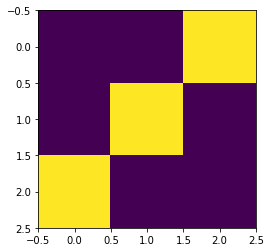

In [7]:
#color map
plt.imshow(img0)

In [8]:
#read an jpg file
img1 = cv2.imread("/Users/hadley/Development/computer_vision/data/lenna.jpg",0)
print(img1.shape)
# first argument is a window name which is a string
cv2.imshow('image', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(256, 256)


### imread 
* imread second argument could be cv2.IMREAD_COLOR, cv2.IMREAD_COLOR, cv2.IMREAD_UNCHANGED
* instead of using three flags, you can simply pass integers 1, 0, -1 respectively

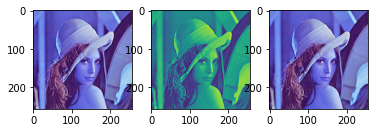

In [14]:
# get access of picture file and use matplotlib to show it
f,axis = plt.subplots(1,3)
for i in range(3):
    img1 = cv2.imread("../data/lenna.jpg",i-1)
    axis[i].imshow(img1)
plt.show() # note that color image loaded by opencv is in BGR mode while maplotlib displays in RGB mode
# img1 = cv2.imread("../data/lenna.jpg",0)
# plt.imshow(img1, cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])
# plt.show()

### imwrite

In [17]:
### imwrite, cv2.imwrite(string::path, source_data)
for i in range(3):
    img = cv2.imread('../data/lenna.jpg', i-1)
    cv2.imwrite('../data/lenna'+str(i)+'.jpg', img)

In [18]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


## drawing functions

(4, 2)


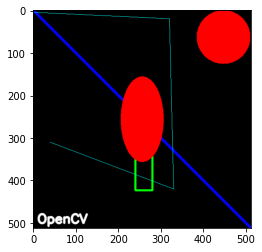

In [58]:
#create a black colored image
img = np.zeros((512,512,3), np.uint8)
#draw a diagonal blue line with thickness of 5px
cv2.line(img, (0,0), (511,511), (0,0,255), 5)
#drawing a rectangle, (img source, left-top point, right-bottom point, color, thickness)
cv2.rectangle(img,(240,234), (280,423), (0,255,0), 3)
#drawing circle, thickness -1 means to fill color to cover the whole circle(img source, center point, radius, color, flag)
cv2.circle(img, (447,63), 63, (255,0,0),-1)
#drawing ellipse, (img_source, center_location, rotation angle, starting and ending arc of ellipse, color, flag)
cv2.ellipse(img,(256,256),(100,50),270,0,360,(255,0,0),-1)
# adding text to images, (imge_source, text_string, text_format, size, color, thickness, lineformat)
cv2.putText(img, 'OpenCV', (10,500), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255,), 4, cv2.LINE_AA)
# drawing polygon
pts = np.array([[4,5],[320,20],[330,420],[40,310]], np.int32)
print(pts.shape)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],False,(0,255,255))
cv2.imwrite('../data/drawing_pic.jpg', img)
plt.imshow(img)

In [ ]:
## Mouse as a Paint-Brush
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)


# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [59]:
## track bar
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

In [2]:
#read an jpg file
import cv2
import numpy
img1 = cv2.imread("/Users/hadley/Development/computer_vision/data/lenna.jpg",1)
print(img1.shape)

(256, 256, 3)


In [6]:
# accessing a pixel
px = img1[100,100]
print(px)

[ 83  40 115]


In [16]:
# accessing a pixel one color
list=['red','green','blue']
for i,color in enumerate(list):
    # displaying pixel value
    print(f"current color of {color} is {img1[100,100,i]}")
    # modifying the pixel values
    img1[100,100,i] = i*100 %256
    print(img1[100,100])
# gr = img1[100,100,1]
# print(gr)

current color of red is 83
[  0  40 115]
current color of green is 40
[  0 100 115]
current color of blue is 115
[  0 100 200]


In [17]:
#better way to access pixel value
img1.item(100,100)


ValueError: incorrect number of indices for array

In [20]:
print(img1.item(100,100,0))
print(img1.item(100,100,1))
print(img1.item(100,100,2))

0
100
200


## accessing image properties

In [3]:
# shape of picture
print(img1.shape)

(256, 256, 3)


In [4]:
# image data type
print(img1.dtype)

uint8


In [8]:
# image size(rows*cols*channels)
print(img1.shape[0]*img1.shape[1]*img1.shape[2])
print(img1.size)

196608
196608


In [10]:
# image ROI
img2 = cv2.imread("../data/messi5.jpg")
ball = img2[280:340, 330:390]
img2[273:333,100:160] = ball
cv2.imwrite("../data/messi5_roi.jpg", img2)

True

In [11]:
## splitting and mergin image channels
b,g,r = cv2.split(img2)
img2 = cv2.merge((b,g,r))
#numpy is much more efficient and should be used if possible
b=img[:,:,0]

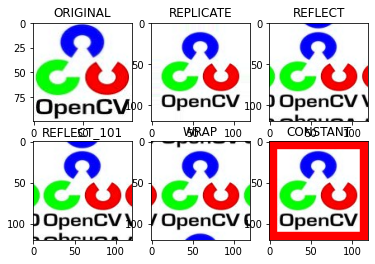

In [3]:
# padding
BLUE = [255,0,0]

img2 = cv2.imread('../data/opencv_logo.jpg')

replicate = cv2.copyMakeBorder(img2,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img2,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img2,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img2,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img2,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img2,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

## arithmetic operations on image

In [5]:
# image addition
x = np.uint8([250])
y = np.uint8([10])
print(x+y)
print(cv2.add(x,y))

[4]
[[255]]


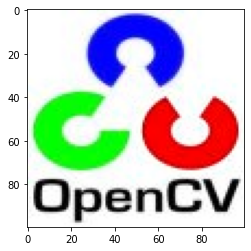

In [10]:
# image blending, two images have to be the same size and channel numbers
img1 = cv2.imread('../data/opencv_logo.jpg',-1)
img2 = cv2.imread('../data/opencv_logo.jpg',-1)
dst = cv2.addWeighted(img1, 0.3, img2, 0.7,0)

plt.imshow(dst)

In [45]:
#bitwise operations
img1 = cv2.imread('../data/messi5.jpg')
img2 = cv2.imread('../data/opencv_logo.jpg')
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
cv2.imwrite('../data/img2gray.jpg',img2gray)
ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY)
cv2.imwrite('../data/mask.jpg',mask)
#white region of text
mask_inv = cv2.bitwise_not(mask)
cv2.imwrite('../data/mask_inv.jpg',mask_inv)
#black out area of logo in ROI
img_bg = cv2.bitwise_and(roi, roi, mask = mask)
cv2.imwrite('../data/img_bg.jpg', img_bg)
# take only region of logo from logo image
img_fg = cv2.bitwise_and(img2, img2, mask = mask_inv)
cv2.imwrite('../data/img_fg.jpg', img_fg)
dst = cv2.add(img_bg, img_fg)
cv2.imwrite('../data/dst.jpg', img_bg)
img1[0:rows, 0:cols] = dst
cv2.imwrite('../data/messi5_bitwise.jpg', img1)

True

In [46]:
def bitwise_operation():
    #bitwise operations
    img1 = cv2.imread('../data/messi5.jpg')
    img2 = cv2.imread('../data/opencv_logo.jpg')
    rows, cols, channels = img2.shape
    roi = img1[0:rows, 0:cols]
    img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    cv2.imwrite('../data/img2gray.jpg',img2gray)
    ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY)
    cv2.imwrite('../data/mask.jpg',mask)
    #white region of text
    mask_inv = cv2.bitwise_not(mask)
    cv2.imwrite('../data/mask_inv.jpg',mask_inv)
    #black out area of logo in ROI
    img_bg = cv2.bitwise_and(roi, roi, mask = mask)
    cv2.imwrite('../data/img_bg.jpg', img_bg)
    # take only region of logo from logo image
    img_fg = cv2.bitwise_and(img2, img2, mask = mask_inv)
    cv2.imwrite('../data/img_fg.jpg', img_fg)
    dst = cv2.add(img_bg, img_fg)
    cv2.imwrite('../data/dst.jpg', img_bg)
    img1[0:rows, 0:cols] = dst
    cv2.imwrite('../data/messi5_bitwise.jpg', img1)

In [58]:
# measuring performance with opencv
e1 = cv2.getTickCount()
bitwise_operation()
e2 = cv2.getTickCount()
e3 = cv2.getTickCount
time = (e2-e1)/cv2.getTickFrequency()
print(time)

0.026847674


In [76]:
img1 = cv2.imread('../data/messi5.jpg')
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print( t )
# Result I got is 0.521107655 seconds

0.436459337


In [60]:
# default optimization in opencv
# check if optimization is enabled
cv2.useOptimized()

True

In [64]:
%timeit res = cv2.medianBlur(img1, 49)

17.1 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
cv2.setUseOptimized(False)
cv2.useOptimized()

False

In [69]:
%timeit res = cv2.medianBlur(img1, 49)

19.9 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [70]:
# measuring performance in Ipython
x = 5
%timeit y=x**2

427 ns ± 48.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [71]:
%timeit y=x*x

64.8 ns ± 2.02 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [72]:
z = np.uint8([5])
%timeit y=z*z

829 ns ± 91.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [73]:
%timeit y=np.square(z)

704 ns ± 48.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [80]:
# cv2.countNonzero is not working??????
img1 = cv2.imread('../data/mask.jpg')
%timeit s= cv2.countNonZero(img1)

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-b4ibzwe2/opencv/modules/core/src/count_non_zero.dispatch.cpp:130: error: (-215:Assertion failed) cn == 1 in function 'countNonZero'
